In [1]:
import pandas as pd
from pandas import DataFrame as DF, Series

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

## Working with Graphs using Networkx Intro

When creating a graph object, it can either be empty (default) or you can pass data as an argument. The data can take multiple forms:

* an edge list
* a numpy matrix or 2D ndarray
* a Networkx graph object
* a scipy sparse matrix
* a PyGraphviz graph

Let's start by creating an empty graph, and then add nodes.

In [2]:
# isntantiate a graph object
G = nx.Graph()

# add a single node
G.add_node(1)
# add multiple nodes from a list
G.add_nodes_from([2,3,5])

# return lists of nodes and edges in the graph
G.nodes(), G.edges()

([1, 2, 3, 5], [])

Notice that the edge list is empty, since we haven't added any edges yet. Also, because the number of edges in a graph can become very large, there is an iterator method for returning edges: `edges_iter()`.

In [3]:
# add a single edge between 3 and 5
G.add_edge(3,5)
# add multiple edges using list of tuples
edge_list = [(1,2),(2,3),(2,5)]
G.add_edges_from(edge_list)

G.edges()

[(1, 2), (2, 3), (2, 5), (3, 5)]

If we had a script that needs to add a single edge from a tuple, we would use `*` preceeding the tuple or it's assigned variable in the `add_edge` method:

In [4]:
# the asterisk indicates that the values should be extracted
G.add_edge(*(1,3))
G.edges()

[(1, 2), (1, 3), (2, 3), (2, 5), (3, 5)]

We can also add nodes and edges using objects called *nbunch* and *ebunch*. These objects are any iterables or generators of nodes or edge tuples. We will do this below using a couple different methods.

In [5]:
# generate a graph of linearly connected nodes
# this is a graph of a single path with 5 nodes and 4 edges
H = nx.path_graph(5)
# a look at the nodes and edges produced
H.nodes(), H.edges()

([0, 1, 2, 3, 4], [(0, 1), (1, 2), (2, 3), (3, 4)])

In [6]:
# Create a graph using nbunch and ebunch from the graph H
G = nx.Graph()
G.add_nodes_from(H)
# we have to specify edges
G.add_edges_from(H.edges())

G.nodes(), G.edges()

([0, 1, 2, 3, 4], [(0, 1), (1, 2), (2, 3), (3, 4)])

In [7]:
# now add edges to a graph using an iterator instead of an iterable list
# this is another example of ebunch, and node iterators work too
G = nx.Graph()
G.add_nodes_from([1,2,3])
# create edge generator connecting all possible node pairs
from itertools import combinations
edge_generator = combinations([1,2,3], 2)
# to show this is a generator and not a list
print('not a list: ', edge_generator)

# now lets add the edges using the iterator
G.add_edges_from(edge_generator)
G.edges()

not a list:  <itertools.combinations object at 0x7f17aaf80c78>


[(1, 2), (1, 3), (2, 3)]

We can also remove nodes or edges using similar methods, just replacing 'add' with 'remove':

In [8]:
H.nodes(), H.edges()

([0, 1, 2, 3, 4], [(0, 1), (1, 2), (2, 3), (3, 4)])

In [9]:
H.remove_nodes_from([0,4])
H.nodes(), H.edges()

([1, 2, 3], [(1, 2), (2, 3)])

Notice that removing nodes automatically removed the related edges for us. One last basic inspection method is to get a list of neighbors (adjacent nodes) for a specific node in a graph.

In [10]:
H = nx.path_graph(7)
# get the neighbors for node 5
H.neighbors(5)

[4, 6]

While we have been using numbers to represent nodes, we can use any hashable object as a node. For example, this means that lists, sets and arrays can't be nodes, but frozensets can:

In [11]:
G = nx.Graph()
# G.add_node([0,1]) <-- raises error
# G.add_node({0,1}) <-- raises error
G.add_node(frozenset([0,1]))  # this works
G.nodes()

[frozenset({0, 1})]

### Edge properties

We can add weights or other properties to edges in a graph in different ways. The first is to add properties at creation time by passing triples instead of doubles for each edge. The third value will be the edge property.

In [12]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_weighted_edges_from([(1,2,3.14), (2,3,6.5)])

# calling edges() alone will not return weights
print(G.edges(), '\n')

# we need to use the data parameter to get triples
print(G.edges(data='weight'), '\n')

# we can also get data for individual edges
print(G.get_edge_data(1,2))

[(1, 2), (2, 3)] 

[(1, 2, 3.14), (2, 3, 6.5)] 

{'weight': 3.14}


### Subscript notation for accessing edges

We can use subscript notiation on a graph object to easily get edge data. Access edge data for a node by entering that node as the subscript. This will return a dict with connected nodes as keys, and their respective edge weights as values.

In [13]:
# get edge data for node 2
print(G[2], '\n')

# subscript further to get only the weight for edge between 2 and 3
print(G[2][3])

{1: {'weight': 3.14}, 3: {'weight': 6.5}} 

{'weight': 6.5}


We can also modify specific edge attributes:

In [14]:
G[2][3]['weight'] = 17
G[2][3]

{'weight': 17}

And we can add other attributes

In [15]:
G[2][3]['attr'] = 'value'
G[2][3]

{'attr': 'value', 'weight': 17}

## 1. Create a complete graph with 7 nodes and verify that it is complete by looking at the edges. Do this manually and using a built-in method.

Remember, a complete graph is an undirected graph that has every pair of nodes connected by a unique edge. In other words, every node is adjacent to every other.

In [16]:
# manually
from itertools import combinations
complete_edges = combinations(range(7), 2)
G_complete = nx.Graph(complete_edges)

G_complete.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]

In [17]:
# built-in method
G_complete = nx.complete_graph(7)
G_complete.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]

## 2. Create a function that will draw a given graph that has a layout type parameter and labels the nodes. Now draw the graph created in the last problem using circular layout.

In [6]:
# function to draw and label nodes in a graph
def draw(G, layout):
    import warnings
    import matplotlib.cbook
    warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    warnings.filterwarnings("ignore",category=UserWarning)
    
    nx.draw(G, pos=layout(G))
    nx.draw_networkx_labels(G, pos=layout(G));

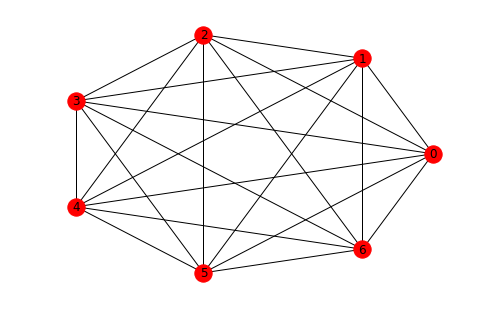

In [19]:
draw(G_complete, nx.circular_layout)

## 3. Create a graph with 10 nodes and 3 components. Draw this graph.

Recall that a component is a connected subgraph.

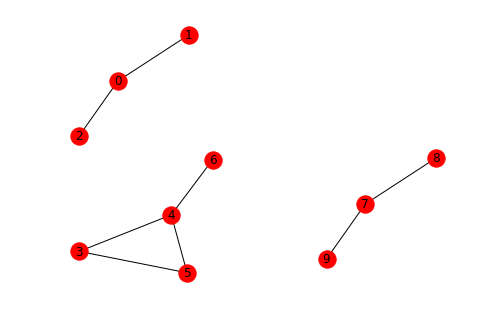

In [20]:
from networkx.drawing.nx_agraph import graphviz_layout

edges_1 = [(0,1), (0,2)]
edges_2 = [(3,4), (3,5), (4,5), (4,6)]
edges_3 = [(7,8), (7,9)]

G = nx.Graph(edges_1 + edges_2 + edges_3)

draw(G, graphviz_layout)

## 4. Create a simple connected digraph with 4 nodes and a diameter of 2.

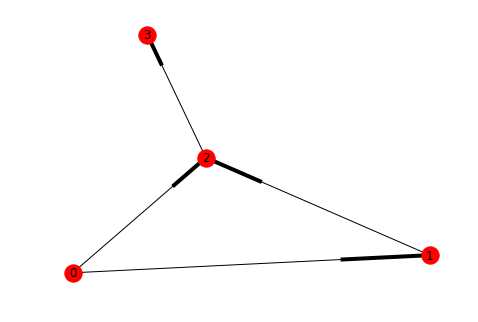

In [21]:
# create in and out edge lists
out_edges = [(0,1), (0,2), (1,2), (2,3)]
# create the empty digraph
G = nx.DiGraph(out_edges)

draw(G, graphviz_layout)

## 5. Create another 4 node digraph with weighted edges. Draw this graph with node and edge weight labels.

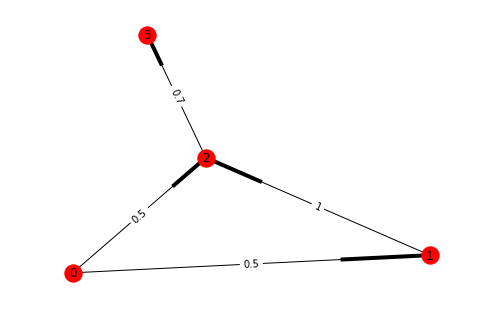

In [22]:
out_edges = [(0,1,0.5), (0,2,0.5), (1,2,1), (2,3,0.7)]
G = nx.DiGraph()
G.add_weighted_edges_from(out_edges)

draw(G, graphviz_layout)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=graphviz_layout(G), edge_labels=labels);

## 6. Create the adjacnency matrix from the edge data in edges_1.pkl

In [3]:
import pickle
with open('../edges_1.pkl', 'rb') as f:
    edges = pickle.load(f)

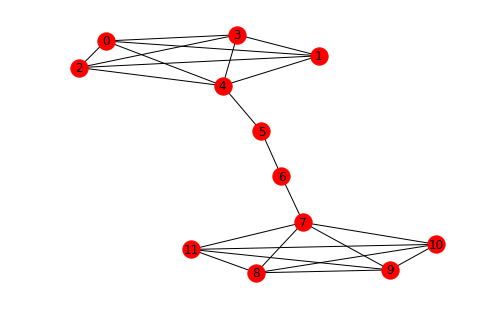

In [24]:
G = nx.Graph(edges)

# lets see what it looks like
draw(G, graphviz_layout)

In [25]:
adj_matrix = nx.to_numpy_matrix(G)
DF(adj_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


## 7. Using networkx built-in functions, create the distance matrix for the same graph from the previous problem

In [26]:
geodesics = nx.all_pairs_shortest_path_length(G)
# this gave us a dict of shortest path lengths between all connected pairs
geodesics

{0: {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 5, 10: 5, 11: 5},
 1: {0: 1, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 5, 10: 5, 11: 5},
 2: {0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 5, 10: 5, 11: 5},
 3: {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 5, 10: 5, 11: 5},
 4: {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 4, 10: 4, 11: 4},
 5: {0: 2, 1: 2, 2: 2, 3: 2, 4: 1, 5: 0, 6: 1, 7: 2, 8: 3, 9: 3, 10: 3, 11: 3},
 6: {0: 3, 1: 3, 2: 3, 3: 3, 4: 2, 5: 1, 6: 0, 7: 1, 8: 2, 9: 2, 10: 2, 11: 2},
 7: {0: 4, 1: 4, 2: 4, 3: 4, 4: 3, 5: 2, 6: 1, 7: 0, 8: 1, 9: 1, 10: 1, 11: 1},
 8: {0: 5, 1: 5, 2: 5, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1, 8: 0, 9: 1, 10: 1, 11: 1},
 9: {0: 5, 1: 5, 2: 5, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1},
 10: {0: 5,
  1: 5,
  2: 5,
  3: 5,
  4: 4,
  5: 3,
  6: 2,
  7: 1,
  8: 1,
  9: 1,
  10: 0,
  11: 1},
 11: {0: 5,
  1: 5,
  2: 5,
  3: 5,
  4: 4,
  5: 3,
  6: 2,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11

In [27]:
# we can easily convert this to a matrix using pandas
DF(geodesics)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,1,1,1,2,3,4,5,5,5,5
1,1,0,1,1,1,2,3,4,5,5,5,5
2,1,1,0,1,1,2,3,4,5,5,5,5
3,1,1,1,0,1,2,3,4,5,5,5,5
4,1,1,1,1,0,1,2,3,4,4,4,4
5,2,2,2,2,1,0,1,2,3,3,3,3
6,3,3,3,3,2,1,0,1,2,2,2,2
7,4,4,4,4,3,2,1,0,1,1,1,1
8,5,5,5,5,4,3,2,1,0,1,1,1
9,5,5,5,5,4,3,2,1,1,0,1,1


## 8. Identify and remove a cutpoint from this graph and re-draw it

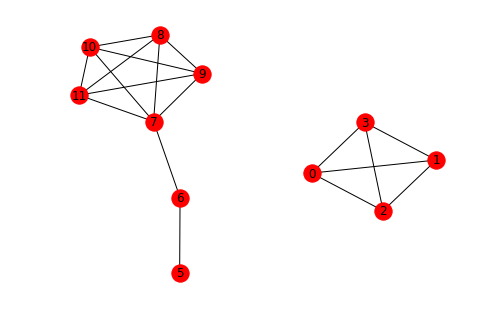

In [28]:
# 4 is a cutpoint
G.remove_node(4)

draw(G, graphviz_layout)

## 9. Use edges_2 to create a graph. List any subgraphs that are maximal cliques

In [29]:
# G = nx.moebius_kantor_graph()
G = nx.dorogovtsev_goltsev_mendes_graph(3)

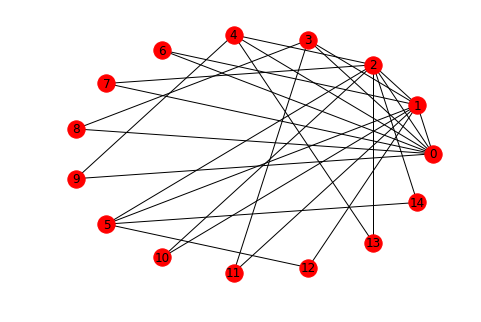

In [7]:
with open('../edges_2.pkl', 'rb') as f:
    edges = pickle.load(f)
    
G = nx.Graph(edges)

# draw(G, graphviz_layout)
draw(G, nx.circular_layout)

In [31]:
list(nx.find_cliques(G))

[[0, 8, 3],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 6],
 [0, 4, 9],
 [0, 4, 2],
 [0, 7, 2],
 [5, 1, 2],
 [5, 1, 12],
 [5, 14, 2],
 [10, 1, 2],
 [11, 1, 3],
 [13, 2, 4]]

## 10. Determine the Degree, Closeness, and Betweenness measures of centrality for this network

In [32]:
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

In [33]:
Series(degree)

0     0.571429
1     0.571429
2     0.571429
3     0.285714
4     0.285714
5     0.285714
6     0.142857
7     0.142857
8     0.142857
9     0.142857
10    0.142857
11    0.142857
12    0.142857
13    0.142857
14    0.142857
dtype: float64

In [34]:
Series(closeness)

0     0.700000
1     0.700000
2     0.700000
3     0.538462
4     0.538462
5     0.538462
6     0.500000
7     0.500000
8     0.451613
9     0.451613
10    0.500000
11    0.451613
12    0.451613
13    0.451613
14    0.451613
dtype: float64

In [35]:
Series(betweenness)

0     0.315018
1     0.315018
2     0.315018
3     0.047619
4     0.047619
5     0.047619
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

## 11. Based on the measures above, which actors have the greatest control over the flow of information? Why do some actors have betweenness measures of zero?

When considering control over flow of information, we look at the betweenness measure. In this case, actors 0, 1, and 2 have the greatest control over information flow. The actors with betweenness measures of zero have no geodesics through them connecting other pairs of nodes. For example, there is a path from 0 to 4 that goes through 9, but that has a length of 2 and 0 connects to 4 directly.

## 12. Create a copy of the last network and do the following:
* remove node 0
* add and edge between 10 and 14 and remove the edge between 1 and 2
* draw the graph
* determine the eccentricity of node 1
* find all cliques containing node 1
* compute the density of the graph
* remove node 1 and compute the density of the resulting graph

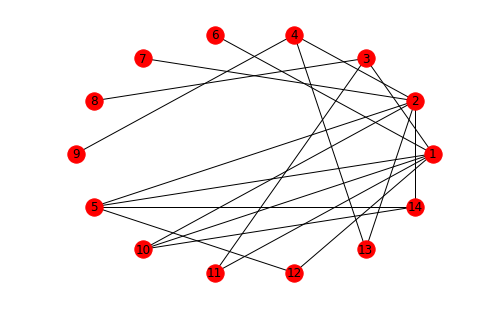

In [8]:
H = G.copy()
H.remove_node(0)
H.add_edge(10,14)
H.remove_edge(1,2)
# draw(H, graphviz_layout)
draw(H, nx.circular_layout)

In [9]:
# eccentricity of node 1
nx.eccentricity(H, 1)

4

In [11]:
# find cliques containing node 1
nx.cliques_containing_node(H, 1)

[[1, 3, 11], [1, 5, 12], [1, 6], [1, 10]]

In [39]:
# density
nx.density(H)

0.2087912087912088

In [40]:
# remove node 1
H.remove_node(1)
nx.density(H)

0.16666666666666666

## 13. Create a directed graph from edges_3.pkl and do the following:
* create the adjacency matrix
* compute the indegree and outdegree centrality for all actors in this network using the adjacency matrix
* compare your results to the in and out_degree_centrality methods

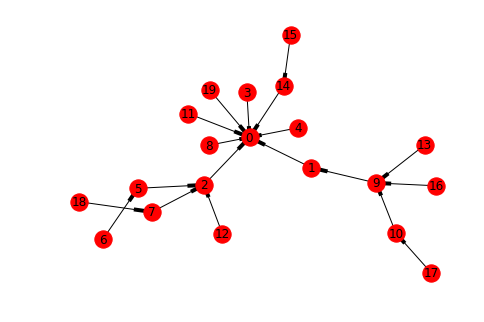

In [41]:
with open('edges_3.pkl', 'rb') as f:
    edges = pickle.load(f)
    
G = nx.DiGraph(edges)
draw(G, graphviz_layout)

In [42]:
# adjacency matrix
adj_matrix = nx.to_numpy_matrix(G)
DF(adj_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# indegree and outdegree
indegree = adj_matrix.sum(axis=0) / (len(adj_matrix)-1)
outdegree = adj_matrix.sum(axis=1) / (len(adj_matrix)-1)

in_method = nx.in_degree_centrality(G)
out_method = nx.out_degree_centrality(G)

In [44]:
# indegree comparison
(Series(np.array(indegree).flatten()) == Series(in_method)).all()

True

In [45]:
# outdegree comparison
(Series(np.array(outdegree).flatten()) == Series(out_method)).all()

True

In [46]:
Series(in_method).sort_values(ascending=False)

0     0.421053
2     0.157895
9     0.157895
14    0.052632
1     0.052632
10    0.052632
5     0.052632
7     0.052632
16    0.000000
6     0.000000
17    0.000000
3     0.000000
4     0.000000
8     0.000000
15    0.000000
18    0.000000
11    0.000000
12    0.000000
13    0.000000
19    0.000000
dtype: float64

Node 0 has the greatest in-degree centrality, which is obvious when looking at the graph.